<a href="https://colab.research.google.com/github/mateusgandra/data_science/blob/master/Analisando_os_Dados_do_Airbnb_(Munique).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

##### **Data Science na Prática 2.0**

---

# Análise dos Dados do Airbnb - *Munique*
*por Mateus Gandra*
 
O [Airbnb](https://www.airbnb.com.br/) é considerado atualmente a maior empresa hoteleira no mundo. Entretanto, seu modelo de negócio se diferencia dos demais por não possuir **nenhum** hotel.

Fundada em 2008, a Startup conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática. O Airbnb tem fornecido uma plataforma inovadora para tornar o processo de hospedagem mais alternativa e que já foi utilizada por **mais de 300 milhões de pessoas** ao redor te todo o mundo.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

**Neste *notebook*, serão analisados os dados referentes à cidade Munique (Alemanha) para extrair insights a partir dos dados brutos.**

<img alt="Landscape Munique" width="100%" src="https://github.com/mateusgandra/suporte/blob/master/Munique.png?raw=true">

###**Sobre a cidade de Munique**

Munique (em alemão: München) é uma cidade da Alemanha, capital do estado alemão da Baviera, no sudeste do país. No ano de 2012, contava com cerca de 1,3 milhão de habitantes, enquanto a sua região metropolitana, que engloba diversas cidades vizinhas ou próximas, abriga mais de 2,6 milhões de pessoas. Munique é a cidade mais populosa da Baviera e do sul da Alemanha, e a terceira cidade mais populosa do país (depois da capital, Berlim, e de Hamburgo).

A Munique moderna é um importante e desenvolvido centro financeiro, urbano, logístico, cultural e político da Alemanha e da Europa continental. É sede de diversas empresas de renome mundial, incluindo a montadora BMW. Entre 2011 e 2012, Munique foi posicionada na 4ª posição entre as "Cidade Mais Habitáveis do Mundo", segundo estudos da consultoria internacional Mercer. A partir de 2006, o lema da cidade passou a ser "München mag dich" (Munique ama você).

Com a nova divisão das regiões da cidade em 1992, o número de bairros de Munique diminuiu de 41 para 25. Abaixo encontra-se os bairros listados em ordem alfabética. De maneira geral, quanto mais alta a numeração indicada em um deles, mais novo é o bairro:


![Bairros de Munique](https://github.com/mateusgandra/suporte/blob/master/Stadtbezirke.png?raw=true)


É em Munique que se realiza anualmente a Oktoberfest, uma tradicional festa alemã. A Oktoberfest (também conhecida como "Wiesn" em Munique) é um festival de cerveja originado em Munique e foi criada pelo rei bávaro Luís I para celebrar o seu casamento em 1810. A festa, para a qual estavam convidados todos os moradores de Munique, aconteceu num parque batizado como Theresienwiese, em homenagem à noiva, no bairro de Ludwigsvorstadt-Isarvorstadt (centro da cidade). Ainda hoje, é neste mesmo parque que acontece a Oktoberfest de Munique. 

<img alt="Oktoberfest" width="70%" src="https://github.com/mateusgandra/suporte/blob/master/Oktoberfest.jpg?raw=true">


A Oktoberfest é também uma feira de produtos e diversões, sendo o evento um dos principais alicerces turísticos da Alemanha e disseminada por vários lugares do mundo. Anualmente, a Oktoberfest é frequentada por cerca de seis milhões de visitantes de todo o mundo e se inicia desde 1872 sempre no sábado depois do 15 de Setembro as 12.00 horas com a tradicional cerimonia de abertura "O'zapft is". Termina duas semanas mais tarde, no primeiro domingo de outubro - daí o nome Oktoberfest (em alemão, "Oktober" significa outubro, "Fest", festa ou festival, literalmente "Festa de Outubro").


---
Fonte:
* [Wikpedia](https://pt.wikipedia.org/wiki/Munique)

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# importar o arquivo listings.csv para um DataFrame
data = pd.read_csv('http://data.insideairbnb.com/germany/bv/munich/2020-04-25/visualisations/listings.csv')
df = data.copy(deep=True)

## Análise dos Dados
**Dicionário das variáveis:**

* **id -** Número gerado para identificar o imóvel (identidade);
* **name -** Nome da propriedade anunciada ;
* **host-id -** Número gerado para identificar o proprietário do imóvel;
* **host_name -** Nome do responsável legal do imóvel;
* **neighbourhood_group -** Distrito da cidade;
* **neighbourhood -** Nome do bairro ou logradouro onde o imóvel está localizado;
* **latitude -** coordenada de latitude do imóvel;
* **longitude -** coordenada de longitude do imóvel;
* **room_type -** Tipo de acomodação disponível no imóvel (ex.: quarto privativo, estabelecimento completo);
* **price -** Preço orçado para o aluguel;
* **minimum_nights -** Número mínimo de noites para aluguel do estabeleciimento;
* **number_of_reviews -** Número de reviews feitos a respeito do imóvel ou trâmites para o aluguel;
* **last_review -** Último reviews realizado sobre o imóvel;
* **reviews_per_month -** Número de reviews por mês;
* **calculated_host_listings_count -** Número de imóveis de um mesmo anfitrião;
* **availability_365 -** Número de dias disponíveis em um prazo de 365 dias.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

*A data informada no banco de dados durante a realização dessas análises é 25/04/2020.*

In [ ]:
# mostrar todas as variáveis
df.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36720,"Beautiful 2 rooms flat, Glockenbach",158413,Gabriela,NaN,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Entire home/apt,95,2,25,2017-07-22,0.34,1,0
1,49309,Sublet - Apartment with Balcony in Downtown (1),224802,Damien,NaN,Ludwigsvorstadt-Isarvorstadt,48.12456,11.55567,Private room,40,14,40,2017-10-15,0.34,1,364
2,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,131,2019-10-03,1.26,2,229
3,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,1,53,2019-10-06,0.49,2,142
4,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,120,2,84,2020-03-01,0.78,2,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O dataset que será explorado nesse projeto é a versão resumida do arquivo disponível para essa cidade. Para uma análise mais detalhada é possível usar uma versão mais completada, disponibilizada nesse [link](https://colab.research.google.com/drive/125nhJYvOyY5K0Ws-kVZP1zvdj3wAJGCp#scrollTo=6-B_qtEaYEd-&line=3&uniqifier=1).


In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas =\t {}'.format(df.shape[0]))
print('Variáveis =\t {}\n'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas =	 11131
Variáveis =	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

O conjunto de dados possui 16 variáveis, apresentadas no forma de colunas, e 11.131 entradas, dispostadas na forma de linhas.


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Uma métrica muito importate para determinar a qualidade de um dataset é a porcentagem de valores nulos. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  23.762465
last_review                        23.762465
name                                0.179678
host_name                           0.053904
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

Neste dataset, é possível observar que dos 16 atributos apresentados, cerca de 31% das variáveis (5 variáveis) apresentam valores nulos e, destas 3 apresentam mais de 15% dos seus valores nessa classificação.

* A variável "neighbourhood_group) apresenta 100% dos seus dados como "nulo";
* Ambas as variáveis "reviews_per_month" e "last_review" apresentam cerca de 23% de suas entradas como nulos;
* Já as variáveis "name" e "host_name" possuem, respectivamentem, 0,17% e 0,05% de suas entradas como nulas.

### **Q3. Qual o tipo de distribuição das variáveis?** 

A avaliação da distribuição das variáveis será feita plotando histograma.

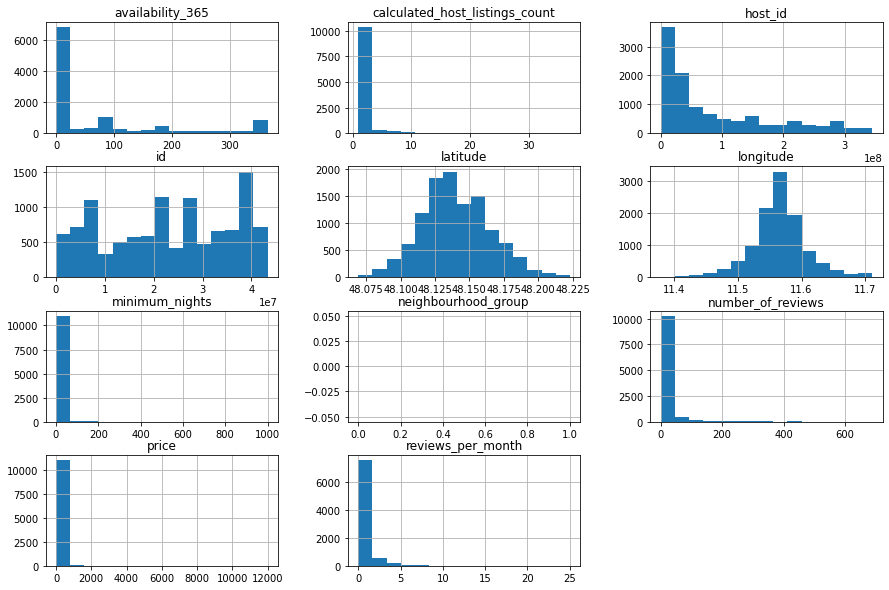

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. É possível identificar outliers?**

A presença de outliers (ou valores atípicos) são observações que apresentam grande afastamento dos demais valores da série ou são inconsistentes. Tipicamente, um dataset com outliers possui ruidos que prejudicam a interpretação dos resultados dos testes estatísticos aplicados às amostras.
A análise dos histogramas, juntamente com a tabela com análise descritiva revela alguns pontos:
*   Para a variável "price", 75% dos valores dos imóveis são de até 128 reais, (cerca de 10X menores que o valor máximo, 12000 reais);
*   Para a variável "minimum_nights" o valor máximo apresentado, 1000 noites, ultrapassa o período de 30 dias. É importante ressaltar que contratos de aluguéis registrados tendem a seguir a vigência mínima de 6 ou 12 meses.

In [ ]:
# Análise estatística descritiva das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews',
               'reviews_per_month', 'calculated_host_listings_count', 'latitude', 'longitude']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,latitude,longitude
count,11131.000000,11131.000000,11131.000000,8486.000000,11131.000000,11131.000000,11131.000000
mean,116.398796,5.561136,15.522235,0.711913,1.874674,48.140349,11.564691
std,215.215258,25.361266,40.792679,1.161900,3.415468,0.024947,0.043791
min,8.000000,1.000000,0.000000,0.010000,1.000000,48.069290,11.378370
25%,53.000000,1.000000,1.000000,0.130000,1.000000,48.123910,11.540695
50%,80.000000,2.000000,3.000000,0.320000,1.000000,48.137820,11.565820
75%,128.000000,3.000000,12.000000,0.800000,1.000000,48.156575,11.584935
max,12000.000000,1000.000000,688.000000,25.000000,37.000000,48.222970,11.710870


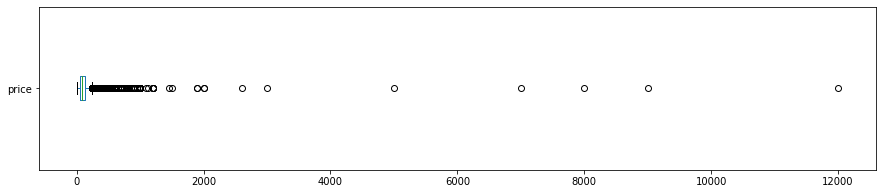

price: valores acima de 1000
137 entradas
3.88%


In [ ]:
#Box-Plot para a variável "price"
df.price.plot(kind='box', vert=False, figsize=(15,3), )
plt.show()

#Ver a quantidade de valores acima de $547 para "price" (mean + 2(std))
print("price: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 547])))
print("{:.2f}%".format((len(df[df.price > 300]) / df.shape[0])*100))


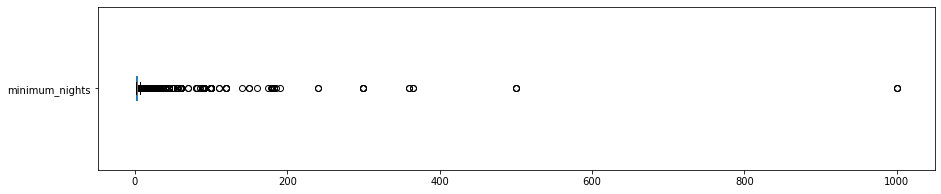

minimum_nights: valores acima de 30 dias
205 entradas
1.84%


In [ ]:
#Box-Plot para a variável "minimum_nights"
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Ver a quantidade de valores acima de 30 dias
print("minimum_nights: valores acima de 30 dias")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Uma vez identificado outliers nas variáveis price e minimum_nights, estes serão removidos. Uma reanalize nos histogramas será feita.

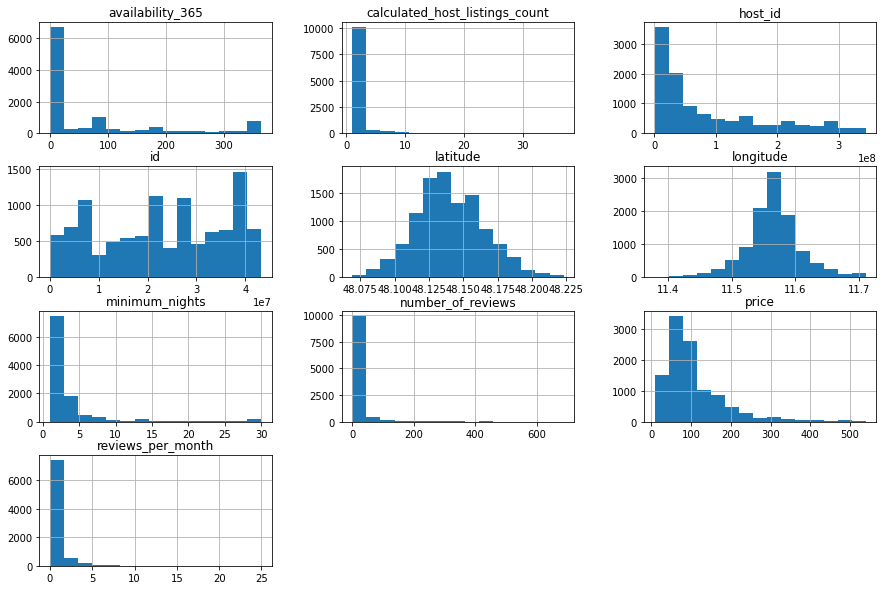

In [ ]:
#Remover os outliers em um novo dataframe
df_clean = df.copy(deep=True)
df_clean.drop(df_clean[df_clean.price > 547].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#Remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#Plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Para esse trabalho exploratório serão utilizadas apenas as variáveis "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "latitude" e "longitude".

In [ ]:
# Análise estatística descritiva das variáveis numéricas
df_clean[['price', 'minimum_nights', 'number_of_reviews',
               'reviews_per_month', 'calculated_host_listings_count', 'latitude', 'longitude']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,latitude,longitude
count,10789.000000,10789.000000,10789.000000,8302.000000,10789.000000,10789.000000,10789.000000
mean,104.176476,3.243489,15.786542,0.718494,1.799981,48.140349,11.564763
std,78.013639,4.826575,41.233893,1.171082,3.100683,0.024974,0.043972
min,8.000000,1.000000,0.000000,0.010000,1.000000,48.069290,11.378370
25%,53.000000,1.000000,1.000000,0.130000,1.000000,48.123910,11.540800
50%,80.000000,2.000000,3.000000,0.320000,1.000000,48.137850,11.566000
75%,125.000000,3.000000,12.000000,0.810000,1.000000,48.156540,11.585150
max,540.000000,30.000000,688.000000,25.000000,37.000000,48.222970,11.710870


### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna "price"
print("A média de valores praticados é $:{:.2f}".format(df_clean['price'].mean()))

A média de valores praticados é $:104.18


### **Q6. Qual a correlação existente entre as variáveis?**

Nessa análise exploratória buscamos identificar se há alguma correlação existente entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, serão montadas:

* Uma matriz de correlação
* Um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corrMatrix_clean = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'latitude', 'longitude']].corr()
# mostrar a matriz de correlação
corrMatrix_clean

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude
price,1.000000,-0.074507,-0.103121,-0.020769,-0.020593,0.018627
minimum_nights,-0.074507,1.000000,-0.067033,0.298455,-0.005385,0.006127
number_of_reviews,-0.103121,-0.067033,1.000000,0.085881,-0.010510,0.040010
calculated_host_listings_count,-0.020769,0.298455,0.085881,1.000000,-0.037721,0.014584
latitude,-0.020593,-0.005385,-0.010510,-0.037721,1.000000,-0.068594
longitude,0.018627,0.006127,0.040010,0.014584,-0.068594,1.000000


De maneira geral, os dados não apresentaram correlação significativa entre si que não tivessem características colineares (ex.: id / host_id e number_of_reviews / reviews_per_month.

De alguma forma, o número de imóveis pertencentes a uma mesma pessoa ("calculated_host_listings_count") parece ter alguma relação com o número mínimo de noites para locação ("minimum_nights").

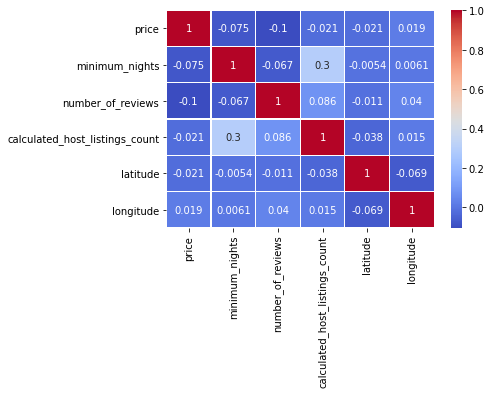

In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(6,4))
sns.heatmap(data=corrMatrix_clean, cmap='coolwarm', linewidths=.1, annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
O sistema do Airbnb categoriza os imóveis disponíveis para aluguel em 4 calsses:
*   Imóvel completo, casa/apartamento;
*   Quarto privativo;
*   Quarto dividido;
*   Quarto de hotel.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_room = df_clean.room_type.value_counts()
df_room

Entire home/apt    6045
Private room       4492
Shared room         180
Hotel room           72
Name: room_type, dtype: int64

In [ ]:
  # mostrar a porcentagem de cada tipo de imóvel disponível
df_room_percent = (df_room/len(df_clean['room_type']))*100
df_room_percent

Entire home/apt    56.029289
Private room       41.634999
Shared room         1.668366
Hotel room          0.667346
Name: room_type, dtype: float64

In [ ]:
# mostrar a média dos preços e dos reviews e a quantidade imóveis cadastrados como "Entire home/apt"
df_entire = df_clean.loc[df_clean['room_type']=='Entire home/apt']
df_e = df_entire[['neighbourhood', 'price']].groupby('neighbourhood').mean()
df_e['number'] = df_entire.neighbourhood.value_counts()
df_e['reviews'] = df_entire[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').mean()
df_e.sort_values(by='price', ascending=True)[:3]

,price,number,reviews
neighbourhood,,,
Ramersdorf-Perlach,91.495327,214,18.182243
Moosach,102.571429,105,6.428571
Milbertshofen-Am Hart,103.708661,254,9.023622


In [ ]:
# mostrar a média dos preços e dos reviews e a quantidade imóveis cadastrados como "Hotel room"
df_hotel = df_clean.loc[df_clean['room_type']=='Hotel room']
df_h = df_hotel[['neighbourhood', 'price']].groupby('neighbourhood').mean()
df_h['number'] = df_hotel.neighbourhood.value_counts()
df_h['reviews'] = df_hotel[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').mean()
df_h.sort_values(by='price', ascending=True)[:3]

,price,number,reviews
neighbourhood,,,
Milbertshofen-Am Hart,79.3,10,17.200000
Moosach,84.0,2,0.000000
Neuhausen-Nymphenburg,85.0,3,53.666667


In [ ]:
# mostrar a média dos preços e dos reviews e a quantidade imóveis cadastrados como "Private room"
df_private = df_clean.loc[df_clean['room_type']=='Private room']
df_p = df_private[['neighbourhood', 'price']].groupby('neighbourhood').mean()
df_p['number'] = df_private.neighbourhood.value_counts()
df_p['reviews'] = df_private[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').mean()
df_p.sort_values(by='price', ascending=True)[:3]


,price,number,reviews
neighbourhood,,,
Milbertshofen-Am Hart,61.276836,177,19.757062
Ramersdorf-Perlach,63.005747,174,25.287356
Feldmoching-Hasenbergl,63.169492,59,31.898305


In [ ]:
# mostrar a média dos preços e dos reviews e a quantidade imóveis cadastrados como "Shared room"
df_shared = df_clean.loc[df_clean['room_type']=='Shared room']
df_s = df_shared[['neighbourhood', 'price']].groupby('neighbourhood').mean()
df_s['number'] = df_shared.neighbourhood.value_counts()
df_s['reviews'] = df_shared[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').mean()
df_s.sort_values(by='price', ascending=True)[:3]

,price,number,reviews
neighbourhood,,,
Laim,30.6,5,18.8
Untergiesing-Harlaching,45.0,2,0.5
Hadern,46.0,5,4.6


In [ ]:
# mostrar a média dos preços, o número de imóveis, a % de imóveis e a média de reviews para todos os tipos de imóveis cadastrados.
df_room_explore = df_clean[['room_type', 'price']].groupby(['room_type']).mean()
df_room_explore['imóveis_n'] = df_room
df_room_explore['imóveis_%'] = df_room_percent
df_room_explore['reviews'] = df_clean[['room_type', 'number_of_reviews']].groupby('room_type').mean()
df_room_explore

,price,imóveis_n,imóveis_%,reviews
room_type,,,,
Entire home/apt,110.595070,5801,55.279207,14.625237
Hotel room,112.383333,60,0.571755,25.450000
Private room,76.963845,4453,42.433772,17.719515
Shared room,70.144444,180,1.715266,15.400000


In [ ]:
# Quantidade de imóveis disponíveis
df_clean['price'].count()

10494


Dos 10.789 imóveis disponíveis, 56,0% estão disponíveis como aluguel de casa/apartamento, seguido de 41,6% dos imóveis disponiilizados para aluguél de quarto privativo. Para os imóveis de Munique cadastrados no Airbnb, apenas 1,7% e 0,7% estão, respectivamente, disponíveis para  aluguéis de quartos compartilhados ou quarto de holtel.

A maior média de preços praticados neste ramo é para aluguel de quartos de hotel, igualmente é para esse nincho que se encontra a maior média de reviews. Esse tipo de resultado poderia apontar, respectivamente, para serviços normalmente encontrado em hotéis (ex.: recepção, camareira, café da manhã incluso) e ação massiva de convite para reviews como forma de expansão do setor.

Analisando os tipos de imóveis por bairros temos:

**Entire home/apt:** 
* *Menor média de preços:* Ramersdorf-Perlach, Moosach, Milbertshofen-Am Hart;
* *Maior média de preços:* Altstadt-Lehel, Tudering-Riem, Schwanthalerhöhe;
* *Maior quantidade:* Ludwigsvorstadt-Isarvorstadt, Maxvorstadt, Schwabing-West;
* *Maior média de reviews:* Maxvorstadt, Bogenhausen, Schwabing-Freimann.

**Hotel room:** -Atenção!!! Amostra pouco representativa.
* *Menor méida de preços:* Milbertshofen-Am Hart, Moosach, Neuhausen-Nymphenburg;
* *Maior média de preços:* Ramersdorf-Perlach, Au-Haidhausen, Altstadt-Lehel;
* *Maior quantidade:* Ludwigsvorstadt-Isarvorstadt, Au-Haidhausen, Milbertshofen-Am Hart;
* *Maior média de reviews:* Maxvorstadt, Neuhausen-Nymphenburg, Schwabing-Freimann.

**Private room:**
* *Menor méida de preços:* Milbertshofen-Am Hart, Ramersdorf-Perlach, Feldmoching-Hasenbergl;
* *Maior média de preços:* Allach-Untermenzing, Schwanthalerhöhe,Altstadt-Lehel;
* *Maior quantidade:* Ludwigsvorstadt-Isarvorstadt, Maxvorstadt, Neuhausen-Nymphenburg;
* *Maior média de reviews:* Feldmoching-Hasenbergl, Ramersdorf-Perlach, Berg am Laim.

**Shared room:** -Atenção!!! Amostra pouco representativa.
* *Menor média de preços:* Laim, Untergiesing-Harlaching, Hadern; 
* *Maior média de preços:* Sendling, Schwanthalerhöhe, Berg am Laim;
* *Maior quantidade:* Ludwigsvorstadt-Isarvorstadt, Milbertshofen-Am Hart, Neuhausen-Nymphenburg;
* *Maior média de reviews:* Ludwigsvorstadt-Isarvorstadt, Au-Haidhausen, Neuhausen-Nymphenburg.

Os preços mais baixos são encontrados preferencialmente nos bairros mais afastados. Já os preços mais altos alternam entre bairros mais localizados em zonas centrais e periféricas de acordo com a classe do imóvel a ser escolhido. O bairro mais antigo "Altstadt-Lehel" (Altstadt, em alemão significa cidade antiga), exceto para a classe de quarto compartilhado, etá ranqueado entre as tres maiores médias de preço.

De maneira geral, os bairros centrais detêm a maioria dos imoveis cadastrados nesse dataset, com atenção para o bairro de Ludwigsvorstadt-Isarvorstadt que lidera a disponibilidade de imóveis em todas as classes.

Para a múmero de reviews, tantos os bairros localizados nas regiões mais centrais quanto os localizados mais perifericamente são ranqueados entre as três maiores médias ao longo de todas as classes de imóveis.

### **Q8. Qual o perfil mais comum dos proprietários dos imóveis?**

A maior parte dos proprietários de imóveis cadastrados possuem 1 ou 2 imóveis e preferencialmente na região central da cidade, especialmente Altstadt-Lehel e Ludwgsvorstadt-Isarvorstadt

In [ ]:
#Identificar a quantos proprietários têm um mesmo número de imóves
df_clean.calculated_host_listings_count.value_counts()

1     8294
2     1349
3      416
4      182
5      106
6       83
8       64
21      42
7       40
10      40
12      36
18      35
34      34
9       29
11      22
37      17
Name: calculated_host_listings_count, dtype: int64

Para as próximas etapas deste tópico, o conjunto de imóveis foi dividido em dois subconjuntos:
* 1 ou 2 imóveis: 9.643 proprietários (89,38%)
* Mais do que 2 imóveis: 1146 proprietários (10,62%) 

In [ ]:
# Separar os proprietários que tem 1 ou 2 imóveis e mostrar a quais bairros pertencem
df_menos = df_clean.loc[df_clean['calculated_host_listings_count']<=2]
df_menor = df_menos[['neighbourhood', 'price']].groupby('neighbourhood').mean()
df_menor['number'] = df_menos.neighbourhood.value_counts()
df_menor['reviews'] = df_menos[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').mean()
df_menor.sort_values(by='price', ascending=False)[:3]


,price,number,reviews
neighbourhood,,,
Altstadt-Lehel,132.669903,309,16.271845
Ludwigsvorstadt-Isarvorstadt,124.182276,993,14.837865
Schwanthalerhöhe,123.335013,397,11.957179


In [ ]:
# indicar qual tipo de imóveis mais comum para os proprietários que tem 1 ou 2 imóveis 
df_menos_room = df_menos[['room_type', 'price', 'minimum_nights']].groupby('room_type').mean()
df_menos_room['number'] = df_menos.room_type.value_counts()
df_menos_room.sort_values(by='minimum_nights', ascending=False)

,price,minimum_nights,number
room_type,,,
Entire home/apt,122.476086,3.597116,5478
Private room,78.985778,2.353543,4008
Hotel room,205.285714,1.857143,7
Shared room,73.393333,1.700000,150


In [ ]:
print('O número médio de noites para esse grupo é {:.2f}'.format(df_menos['minimum_nights'].mean()))
print("O preço médio do grupo com 1 ou 2 imóveis é $:{:.2f}".format(df_menor['price'].mean()))

O número médio de noites para esse grupo é 3.05
O preço médio do grupo com 1 ou 2 imóveis é $:99.76


In [ ]:
# Separar os proprietários que tem mais que 2 imóveis 
df_mais = df_clean.loc[df_clean['calculated_host_listings_count']>2]
df_maior = df_mais[['neighbourhood', 'price']].groupby('neighbourhood').mean()
df_maior['number'] = df_mais.neighbourhood.value_counts()
df_maior['reviews'] = df_mais[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').mean()
df_maior.sort_values(by='price', ascending=True)[:3]

,price,number,reviews
neighbourhood,,,
Obergiesing,67.480000,25,25.240000
Moosach,72.447368,38,3.973684
Aubing-Lochhausen-Langwied,76.777778,9,6.222222


In [ ]:
# indicar qual tipo de imóveis mais comum para os proprietários que tem mais de 2 imóveis.
df_mais_room = df_mais[['room_type', 'price', 'minimum_nights']].groupby('room_type').mean()
df_mais_room['number'] = df_mais.room_type.value_counts()
df_mais_room.sort_values(by='minimum_nights', ascending=False)

,price,minimum_nights,number
room_type,,,
Entire home/apt,121.735450,7.151675,567
Hotel room,173.938462,4.061538,65
Private room,86.917355,2.535124,484
Shared room,53.900000,1.400000,30


In [ ]:
print('O número médio de noites é {:.2f}'.format(df_mais['minimum_nights'].mean()))
print("O preço médio do grupo com mais de 2 imóveis é $:{:.2f}".format(df_maior['price'].mean()))

O número médio de noites é 4.88
O preço médio do grupo com mais de 2 imóveis é $:107.51


**Propriétários com 1 ou 2 imóveis (a média de preço é $99,76):**
* *Menor média de preços:* Hadern, Feldmoching-Hasenbergl, Hadern;
* *Maior média de preços:* Altstadt-Lehel, Ludwigsvorstadt-Isavorstadt, Schwanthalerhöhe;
* *Maior número:* Ludwigsvorstadt-Isarvorstadt, Maxvorstadt, Schwabing-West;
* *Maior média de reviews:* Feldmoching-Hasenbergl, Tudering-Riem, Schwabing-Freimann;
>* *Tipo de imóvel (maior número):* Entire home/apt, Private room, Shared room;
>* *Menor média de preço entre os tipos de imóveis:* Shared room, Private room, Entire home/apt;
>* *Maior média de preço entre os tipos de imóveis:* Hotel room (apenas 7 amostras),  Entire home/apt, Private room.
>* *Número médio de noites:* Aproximadamente 3.


**Proprietários com mais de 2 imóveis (a média de preço é $105,51):**
* *Menor média de preços:* Obergiesing, Moosach, Aubing-Lochhausen-Langwied;
* *Maior média de preços:* Altstadt-Lehel, Untergiesing-Harlaching, Allach-Untermenzing;
* *Maior número:* Ludwigsvorstadt-Isarvorstadt, Ramersdorf-Perlach, Maxvorstadt;
* *Maior média de reviews:* Maxvorstadt, Schwabing-Freimann, Bogenhausen;
>* *Tipo de de imóvel (maior número):* Entire home/apt, Private room, Hotel room;
>* *Maior média de preços entre os tipos de imóveis:* Hotel room, Entire home/apt, Private room;
>* *Menor média de preços entre os tipos de imóveis:* Shared room, Private room, Entire home/apt.
>* *Número médio de noites:* Aproximadamente 5.



###**Q9. Qual a influência do número de reviews nos alugueis dos imóveis**



In [ ]:
# Analisar a distribuição do dateset
df_clean.number_of_reviews.describe()

count    10789.000000
mean        15.786542
std         41.233893
min          0.000000
25%          1.000000
50%          3.000000
75%         12.000000
max        688.000000
Name: number_of_reviews, dtype: float64

Neste momento o dataset será dividido em dois subgrupos: Os imóveis que têm até 3 reviews e aqueles que tem mais de 3 reviews.

In [ ]:
df_menos3 = df_clean.loc[df_clean['number_of_reviews']<=3]
df_me3 = df_menos3[['neighbourhood', 'price', 'number_of_reviews']].groupby('neighbourhood').mean().sort_values(by='number_of_reviews', ascending=False)
df_me3[:3]

,price,number_of_reviews
neighbourhood,,
Milbertshofen-Am Hart,93.172691,1.120482
Schwabing-Freimann,110.520979,1.118881
Sendling-Westpark,104.789954,1.105023


In [ ]:
df_menos3.room_type.value_counts()

Entire home/apt    3112
Private room       2282
Shared room          96
Hotel room           48
Name: room_type, dtype: int64

In [ ]:
print("A média valores praticados para imóveis com mais de 3 reviews é R$:{:.2f}".format(df_menos3.price.mean()))

A média valores praticados para imóveis com mais de 3 reviews é R$:114.19


In [ ]:
df_mais3 = df_clean.loc[df_clean['number_of_reviews']>3]
df_ma3 = df_menos3[['neighbourhood', 'price', 'number_of_reviews']].groupby('neighbourhood').mean().sort_values(by='number_of_reviews', ascending=False)
df_ma3[:3]

,price,number_of_reviews
neighbourhood,,
Milbertshofen-Am Hart,93.172691,1.120482
Schwabing-Freimann,110.520979,1.118881
Sendling-Westpark,104.789954,1.105023


In [ ]:
df_mais3.room_type.value_counts()

Entire home/apt    2933
Private room       2210
Shared room          84
Hotel room           24
Name: room_type, dtype: int64

In [ ]:
print("A média valores praticados para imóveis com mais de 3 reviews é R$:{:.2f}".format(df_mais3.price.mean()))

A média valores praticados para imóveis com mais de 3 reviews é R$:93.61


**Imóveis com até pelo menos 3 reviews de média**

* *Maior média de preço:* Altstadt-Lehel, Ludwigsvorstadt-Isarvorstadt, Schwanthalerhöhe;
* *Menor média de preço:* Milbertshofen-Am Hart, Hadern, Laim;
* *Maior média de reviews:* Milbertshofen-Am Hart, Schwabing-Freimann, Sendling-Westpark;
* *Tipos de imóveis mais frequentes:* Entire home/apt, Private room, Shared room

**Imóveis com mais de 3 reviews de média**

* *Maior média de preço:* Altstadt-Lehel, Schwanthalerhöhe, Ludwigsvorstadt-Isarvorstadt;
* *Menor média de preço:* Hadern, Ramersdorf-Perlach, Moosach;
* *Maior média de reviews:* Feldmoching-Hasenbergl, Maxvorstadt, Schwabing-Freimann;
* *Tipos de imóveis mais frequentes:* Entire home/apt, Private room, Shared room


Apenas a variável preço parece demosntrar alguma relação com a variável reviews. A média de valor encontrado para imóveis com até 3 reviews é de 114,19 euros.


### **Q10. Qual a localidade mais cara em Munique??**

A localidade mais cara do dataset fica no bairro de "Obergiesing", e a id do imóvel é 7573527 e preço de $540,0. Contudo, os bairros com maiores médias de preço são, respectivamente: Altstadt-Lehel, Schwanthalerhöhe e Ludwigsvorstadt-Isarvorstadt. 

In [ ]:
#Localidade mais cara do dataset
df_clean[['id', 'neighbourhood', 'room_type', 'price', 'latitude', 'longitude']].sort_values(by='price', ascending=False).head(1)

,id,neighbourhood,room_type,price,latitude,longitude
1634,7573527,Obergiesing,Entire home/apt,540,48.11585,11.59255


In [ ]:
# ver preços por bairros, na média
df_clean[['neighbourhood', 'price']].groupby(['neighbourhood']).mean().sort_values(by='price', ascending=False)[:3]

,price
neighbourhood,
Altstadt-Lehel,138.697051
Schwanthalerhöhe,122.547393
Ludwigsvorstadt-Isarvorstadt,121.670077


In [ ]:
 #verificar número de locações por bairro
df_clean['neighbourhood'].value_counts()

Ludwigsvorstadt-Isarvorstadt                              1173
Maxvorstadt                                               1052
Schwabing-West                                             807
Neuhausen-Nymphenburg                                      751
Au-Haidhausen                                              709
Schwabing-Freimann                                         590
Bogenhausen                                                506
Milbertshofen-Am Hart                                      453
Schwanthalerhöhe                                           422
Sendling                                                   421
Ramersdorf-Perlach                                         403
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln     388
Altstadt-Lehel                                             373
Laim                                                       371
Obergiesing                                                365
Sendling-Westpark                                      

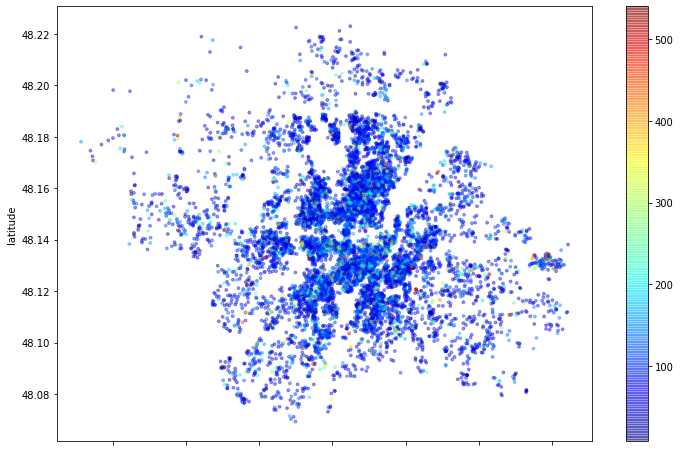

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

***--***

Apesar de a distribuição do número dos imóveis não ser uniforme ao longo dos bairros, apenas dois bairros têm menos de 100 imóveis (Allach-Untermenzing  - 70 e Aubing-Lochhausen-Langwied - 87), o que reduz o efeito de amostra não representativas.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, será considerado "x=longitude" e "y=latitude".

### **Q11. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
nights = df_clean['minimum_nights'].mean()
print('A média do mínimo de noites é {}'.format(int(nights)))
print("(Considerando um valor máximo de $547,00)")

A média do mínimo de noites é 3
(Considerando um valor máximo de $547,00)


### Conclusões



Após uma análise inicial do dataset pudemos verificar que a maior disponibilidade de imóveis e as maiores médias de preços praticados informados neste dataset estão nos bairros mais centrais da cidade.

Uma análise dos preços praticados na cidade:
* Apesar de uma cidade com elevada ação turística para o mês de outubro (Oktoberfest), a disponibilidadde de imóveis com preços até $129 (representam 75% de todos os imóveis disponíveis) é ampplamente distribido por toda a cidade (ver pontos roxos no gráfico de latitude longitude).
* A maior quantidade de imóveis disponíveis está localizada no centro da cidade, especialmente no bairro de Ludwigsvorstadt-Isavorstadt;
* Imóveis localizados em bairros mais periféricos têm, em média, menores valores.

Para os bairros:
* O bairro com maior número de imóveis dispoíveis é o Ludwigsvorstadt-Isarvorstadt (8,5% mais caro que 75% dos imóveis);
* O bairro com maior média de preço é o Altstadt-Lehel (24% mais caro que 75% dos imóveis e que concentra majoritariamente a arquitetura germânica tradicional.

Dentro da classificação do Airbnb para os tipos de imóveis:
* Os quartos de hotel são os que têm a maior média de preço (86% mais caro que 75% dos imóveis) e concentram mais reviews. Entretanto, respondem pela menor parcela de possibilidades (menos de 1% de todos os registros);
* A maior possibilidade de imóveis para alguel é do tipo casa/apartamento completo, que responde por 56% dos imóveis disponíveis e com média de preço de 1,6% maior quue 75% dos imóveis cadastrados.

Sobre os proprietários dos imóveis:
* A grande maioria dos proprietários possuem apenas um imóvel.
* Idependente do número de imóveis do proprietário bairros mais afastados do centro tendem a ser mais baratos que os da região central, tendo "Hadern" e "Ludwigsvorstadt-Isavorstadt" como exemplos, respectivamente;
* Exceto pelo bairro de Maxvorstadt (bairro localizado mais ao centro) os proprietários que têm seus imóveis localizados em bairros mais periféricos tendem a ter maior média de reviews.

Influência do número de reviews:
* Não foi possível identificar diferenças nos números de reviews na relação "preços praticados" x "bairros" x "tipos de imóveis";
* imóveis com até 3 reviews seriam, em média, cerca de 25% mais caros que os imóveis com mais de 3 reviews.

Por essa análise podemos concluir que os imóveis da cidade de Munique cadastrados no Airbnb podem ser encontrados ao longo de toda a cidade com maior concentração nos bairros centrais. As médias de preços alteram de bairro para bairro (principalmente para os que oferecem maiores atrações turísticas), mas sem muito esforço pode-se econtrar ótimos preços. Apesar de todo o fluxo de turistas que a Oktoberfest traz à cidade, aparentemente, existe grande possibilidade de hospedar-se no bairro que evento ocorre pagando um ótimo preço idependende se for um viajante sozinho ou em grupo.

In [ ]:
# Simulação de uma viagem: 4 pessoas, uma semana, até $20/dia, mais próximo ao centro
hospedagem = df_clean.loc[df_clean['room_type']=='Entire home/apt']
tempo = hospedagem.loc[hospedagem['minimum_nights']<=7]
valor = tempo.loc[tempo['price']<=20]
valor['neighbourhood'].value_counts()

Schwabing-Freimann         5
Obergiesing                2
Milbertshofen-Am Hart      1
Maxvorstadt                1
Au-Haidhausen              1
Schwabing-West             1
Berg am Laim               1
Untergiesing-Harlaching    1
Sendling                   1
Name: neighbourhood, dtype: int64

In [ ]:
valor.loc[valor['neighbourhood']=='Sendling']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2817,12043670,LOW BUDGET UNTERKUNFT,64484567,Nesta,Sendling,48.12543,11.54372,Entire home/apt,19,2,16,2017-02-18,0.32,1,0


Dessa forma, minha pesquisa retornou 4 imóveis em 4 bairros distintos:
* **Maxvorstadt:**  id(23114484), valor($20,00), reviews(0);

* **Au-Haidhausen:** id(34992016), valor($18,00), reviews(19).

* **Schwabing-West:** id(35226303), valor($11,00), reviews(3);

* **Sendling:** id(12043670), valor($19,00), reviews(16);

